<a href="https://colab.research.google.com/github/narutsoo/tutorial/blob/master/TDS_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference


*   https://towardsdatascience.com/clustering-algorithm-for-customer-segmentation-e2d79e28cbc3#:~:text=What%20is%20Clustering%20Algorithm%3F,static%20demographics%20and%20dynamic%20behaviors.

*   https://www.kaggle.com/code/destingong/customer-segmentation-using-clustering-algorithm/notebook

In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from pandas.api.types import is_string_dtype, is_numeric_dtype    
df = pd.read_csv("Mall_Customers.csv")

In [2]:
# populate list of numerical and categorical variables
num_list = []
cat_list = []

for column in df:
  if is_numeric_dtype(df[column]):
    num_list.append(column)
  elif is_string_dtype (df[column]):
    cat_list.append (column)

print("numeric:", num_list)
print("categorical:", cat_list)

numeric: ['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical: ['Gender']


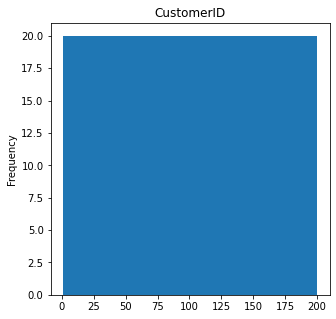

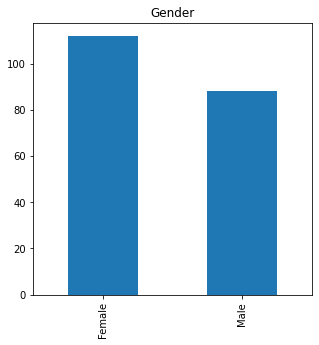

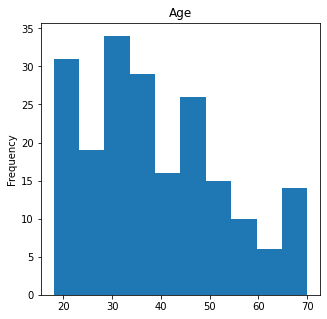

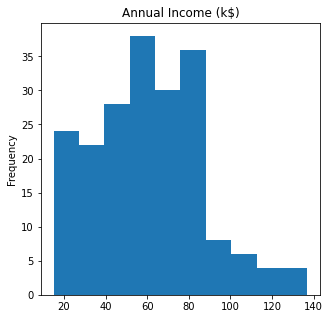

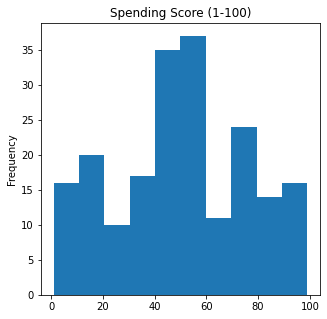

In [3]:
for column in df:
  plt.figure(column, figsize = (5,5))
  plt.title(column)
  if is_numeric_dtype(df[column]):
    df[column].plot(kind='hist')
  elif is_string_dtype (df[column]):
    # show only the TOP 10 value count in each categorical data
    df[column].value_counts()[:10].plot(kind='bar')

In [4]:
df = df.drop(["CustomerID", "Gender"], axis=1)

In [5]:
df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


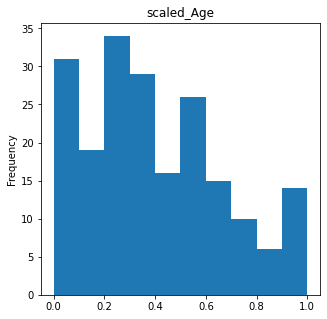

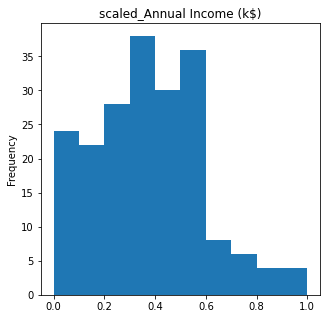

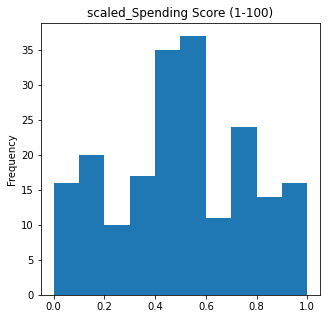

In [6]:
# transform data into the standard scale
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  scaled_var = 'scaled_' + var
  model = scaler.fit(df[var].values.reshape(-1,1))
  df[scaled_var] = model.transform(df[var].values.reshape(-1, 1))

  plt.figure(figsize = (5,5) )
  plt.title(scaled_var)
  df[scaled_var].plot(kind='hist')

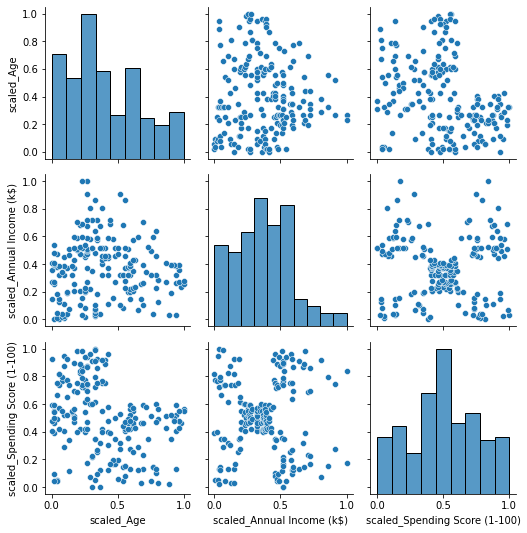

In [7]:
# 2D scatter plot
import seaborn as sns
columns = ["scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]
sns.pairplot(df[columns])

Text(0.5, 0, 'scaled_Spending Score (1-100)')

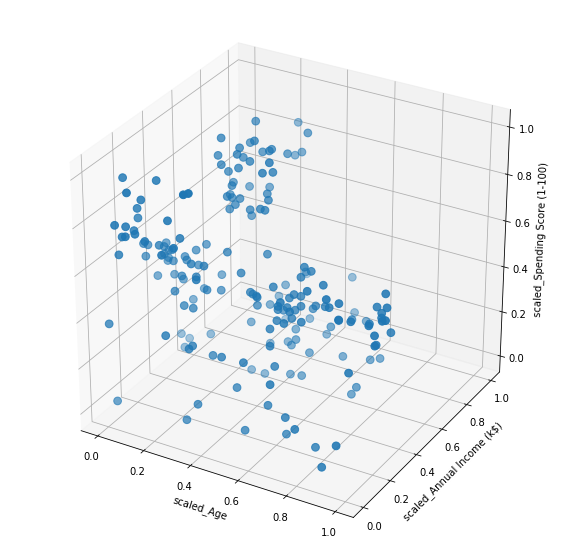

In [8]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

axis_list = ["scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]
X, Y, Z= axis_list

fig = plt.figure(figsize = (10,10) )
ax =fig.add_subplot (projection="3d")
sc =ax.scatter (df[X], df[Y], df[Z], s = 60)
ax.set_xlabel(X)
ax.set_ylabel(Y)
ax.set_zlabel(Z)

In [9]:
# define K Means that return inertia, label, centroids and silhouette score
from sklearn.cluster import KMeans
from sklearn import metrics

def KMeans_Algorithm(dataset, n):
  clustering_KMeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, random_state=0, algorithm="elkan")
  clustering_KMeans.fit(dataset)

  # create data frame to store centroids
  centroids = clustering_KMeans.cluster_centers_
  # centroids_df = pd.DataFrame(centroids, columns =['X', 'Y' ])

  # add cluster label for each data point
  label = clustering_KMeans.labels_
  df["label"] = label

  # evaluation metrics for clustering - inertia and silhouette score
  inertia = clustering_KMeans.inertia_
  silhouette_score = metrics.silhouette_score(dataset, label)

  return inertia, label, centroids, silhouette_score

In [10]:
# Spending vs. Age
X1 = df[["scaled_Age", "scaled_Spending Score (1-100)"]].values

# Spending vs. Annual Income
X2 = df[["scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]].values

# Spending vs. Age vs. Annual Income
X3 = df[["scaled_Age","scaled_Annual Income (k$)","scaled_Spending Score (1-100)"]].values

Text(0, 0.5, 'Silhouette Score')

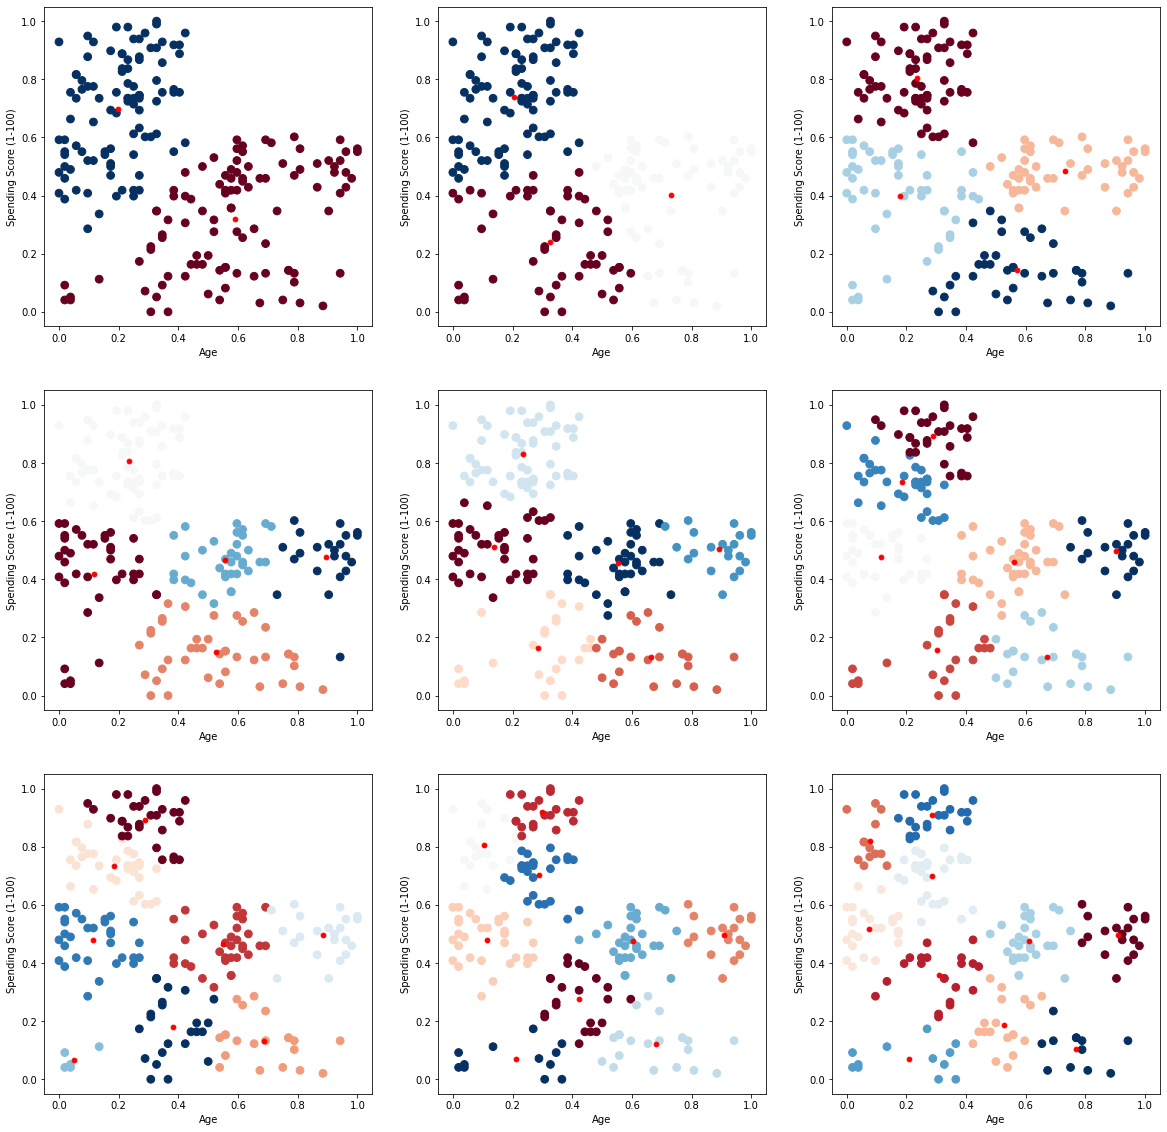

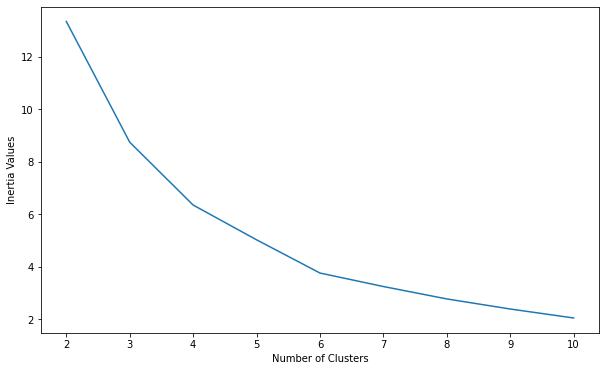

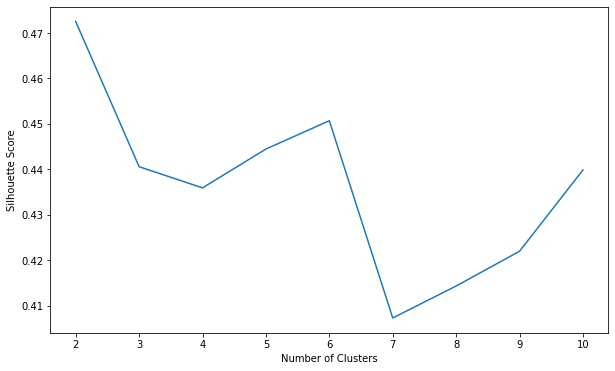

In [11]:
# Spending vs. Age by different numbers of clusters
X1_inertia_values = []
X1_silhouette_scores = []
fig1 = plt.figure(figsize=(20,20))
for i in range (2,11):
  X1_inertia, X1_label, X1_centroids, X1_silhouette = KMeans_Algorithm(X1, i)
  X1_inertia_values.append(X1_inertia)
  X1_silhouette_scores.append(X1_silhouette)
  centroids_df = pd.DataFrame(X1_centroids, columns =['X', 'Y' ])

  sub = fig1.add_subplot(330 + i - 1)
  sub.scatter (df["scaled_Age"], df["scaled_Spending Score (1-100)"], s = 60, c= df["label"], cmap = "RdBu")
  sub.scatter (centroids_df['X'], centroids_df['Y'], s = 90, marker=".", color = "r")
  sub.set_xlabel("Age")
  sub.set_ylabel("Spending Score (1-100)")

# plot inertia values against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2, 11), X1_inertia_values )
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia Values")
# plot silhouette scores against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11), X1_silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score" )

Text(0, 0.5, 'Silhouette Score')

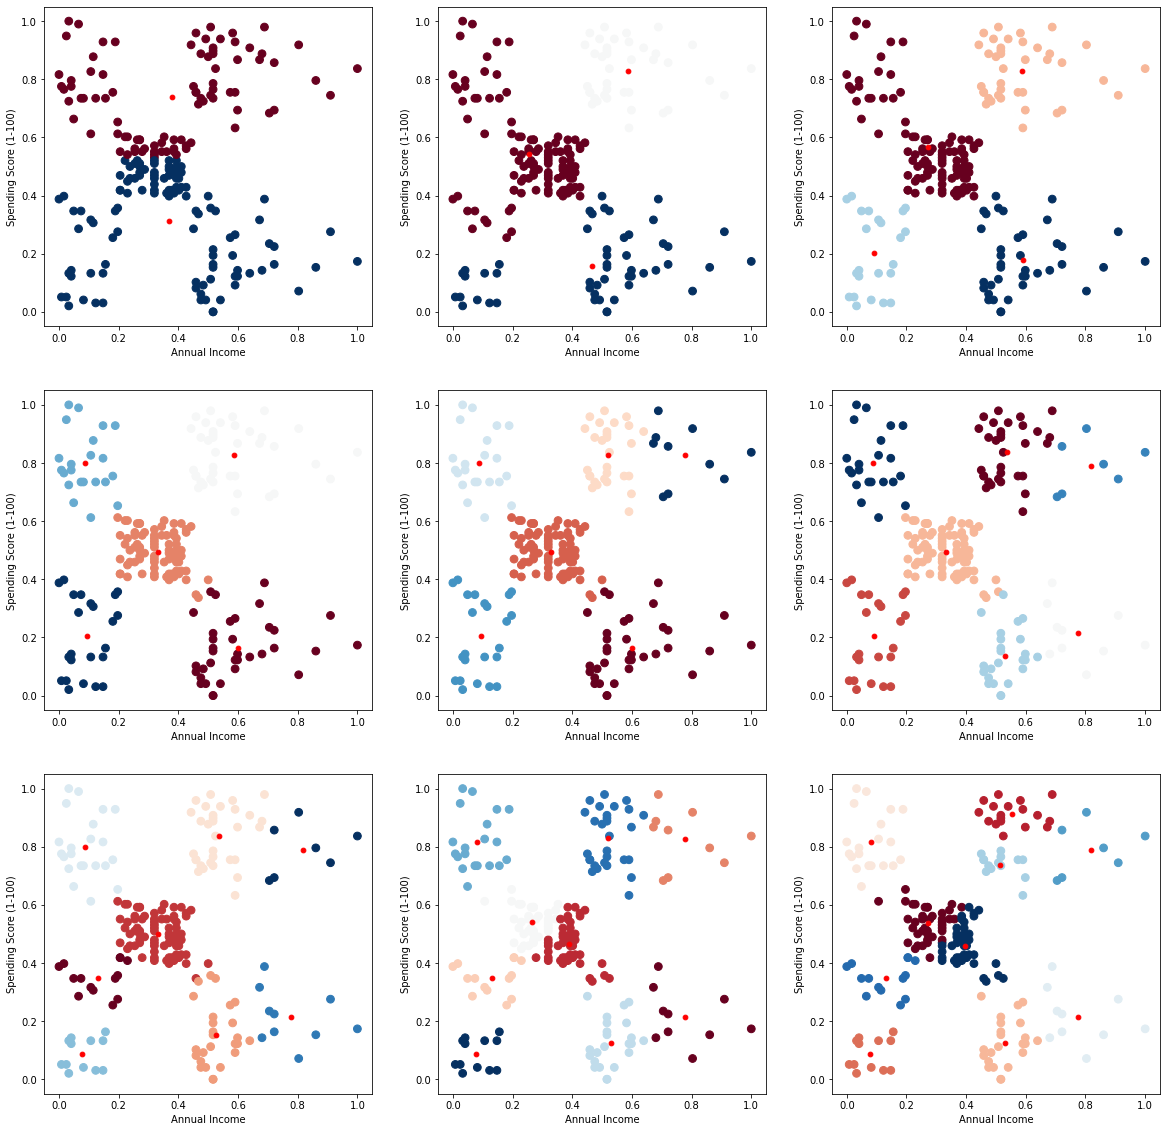

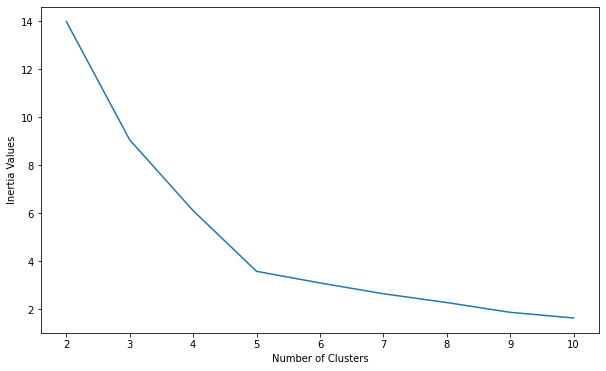

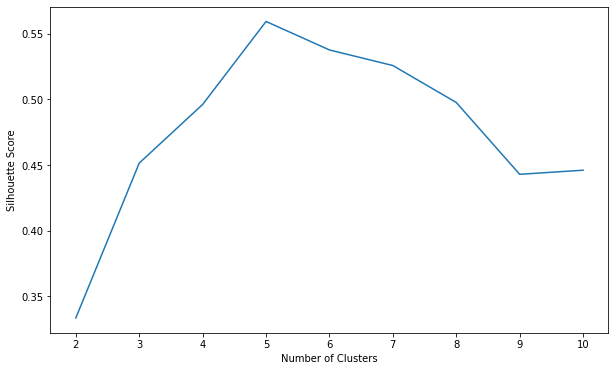

In [12]:
# Spending vs. Annual Income by different numbers of clusters
X2_inertia_values = []
X2_silhouette_scores = []
fig2 = plt.figure(figsize=(20,20))
for i in range (2,11):
  X2_inertia, X2_label, X2_centroids, X2_silhouette = KMeans_Algorithm(X2, i)
  X2_inertia_values.append(X2_inertia)
  X2_silhouette_scores.append(X2_silhouette)
  centroids_df = pd.DataFrame(X2_centroids, columns =['X', 'Y' ])

  sub = fig2.add_subplot(330 + i - 1)
  sub.scatter (df["scaled_Annual Income (k$)"], df["scaled_Spending Score (1-100)"], s = 60, c= df["label"], cmap = "RdBu")
  sub.scatter (centroids_df['X'], centroids_df['Y'], s = 90, marker=".", color = "r")
  sub.set_xlabel("Annual Income")
  sub.set_ylabel("Spending Score (1-100)")

# plot inertia values against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2, 11), X2_inertia_values )
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia Values")
# plot silhouette scores against number of clusters
plt.figure(figsize=(10,6))
plt.plot(np.arange(2,11), X2_silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score" )

Text(0, 0.5, 'Silhouette Score')

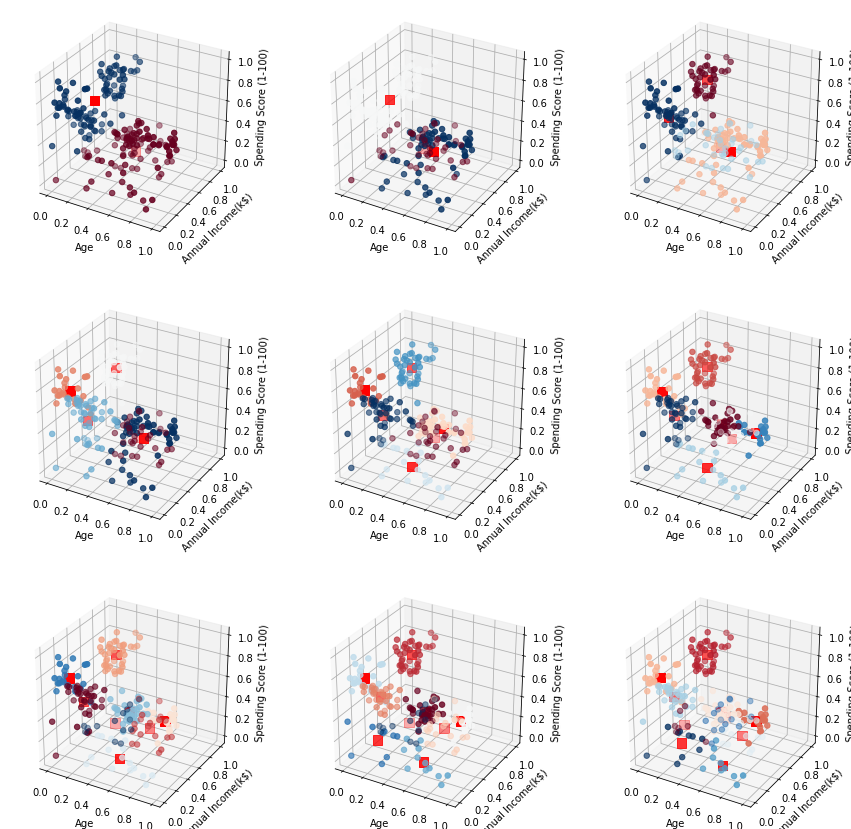

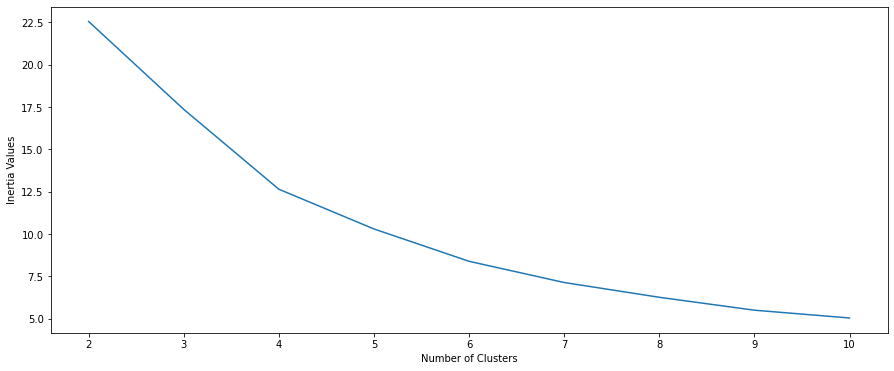

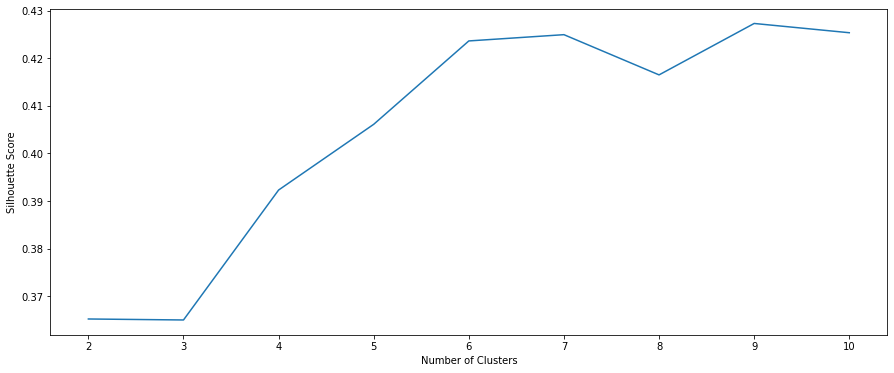

In [17]:
# Spending vs. Annual Income by different numbers of clusters
X3_inertia_values = []
X3_silhouette_scores = []
fig = plt.figure(figsize=(15,15))
for i in range (2,11):
  X3_inertia, X3_label, X3_centroids, X3_silhouette = KMeans_Algorithm(X3, i)
  X3_inertia_values.append(X3_inertia)
  X3_silhouette_scores.append(X3_silhouette)
  centroids_df = pd.DataFrame(X3_centroids, columns =['X', 'Y', 'Z'])
  ax = fig.add_subplot(330 + i - 1, projection='3d' )
  ax.scatter(df["scaled_Age"], df["scaled_Annual Income (k$)"], df["scaled_Spending Score (1-100)"], s=30, c= df["label"], cmap = "RdBu")
  ax.scatter(centroids_df['X'], centroids_df['Y'], centroids_df['Z'], s=90, marker=",", color ="r")
  ax.set_xlabel("Age")
  ax.set_ylabel("Annual Income(k$)")
  ax.set_zlabel("Spending Score (1-100)")

# plot inertia values against number of clusters
plt.figure(11, figsize=(15,6))
plt.plot(np.arange(2, 11), X3_inertia_values, '-')
plt.xlabel ("Number of Clusters")
plt.ylabel ("Inertia Values")
# plot silhouette scores against number of clusters
plt.figure(12, figsize=(15,6))
plt.plot(np.arange(2,11), X3_silhouette_scores, '-')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score" )